# Loading the libraries



In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn
import plotly.express as px
#!pip install --upgrade xlrd

# Loading the data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_excel("default of credit card clients.xls", header = 1, index_col = 0) 
df.rename(columns = {"PAY_0":"PAY_1"}, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploring and Visualizing the data

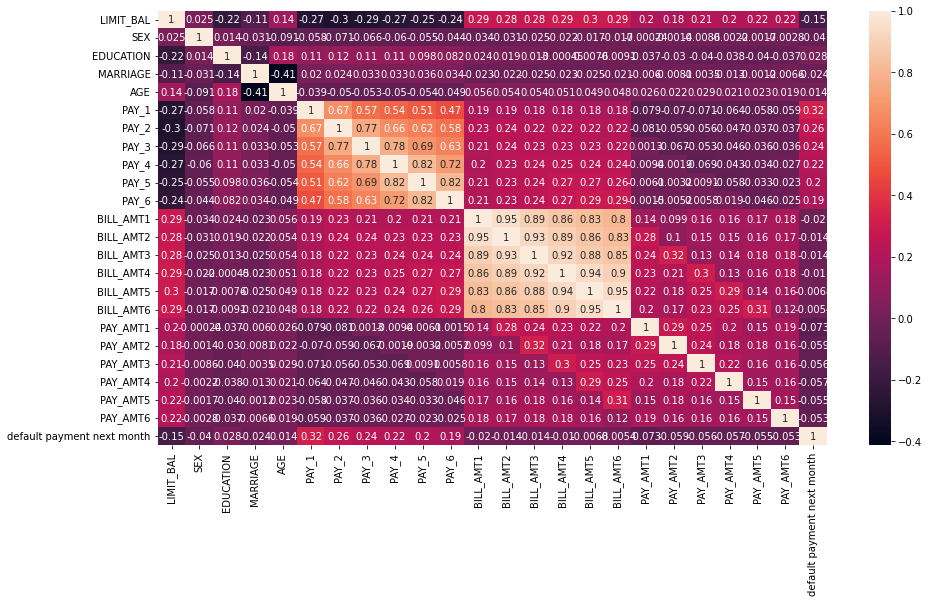

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
print(df["SEX"].value_counts())
print(df["EDUCATION"].value_counts())
print(df["MARRIAGE"].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


In [ ]:
df1 = df.copy(deep = True)
df1["SEX"].replace([1,2],["Male","Female"], inplace = True)
df1["EDUCATION"].replace([0,1,2,3,4,5,6],["NA", "Graduate School", "Universtiy", "High School", "Other", "Other", "Other"], inplace = True)
df1["MARRIAGE"].replace([0,1,2,3],["NA", "Married", "Single", "Other"], inplace = True)

In [ ]:
print("Min Age =", df1["AGE"].min())
print("Mean Age =",df1["AGE"].mean())
print("Max Age =", df1["AGE"].max())

Min Age = 21
Mean Age = 35.4855
Max Age = 79


In [ ]:
print("Min Balance =", df1["LIMIT_BAL"].min())
print("Mean Balance =",df1["LIMIT_BAL"].mean())
print("Max Balance =", df1["LIMIT_BAL"].max())

Min Balance = 10000
Mean Balance = 167484.32266666667
Max Balance = 1000000


In [ ]:
df1["AGE"] = pd.cut(df1["AGE"], bins = [19,29,39,49,59,69,79], labels = ["20s","30s","40s","50s","60s","70s"])

In [ ]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,Universtiy,Married,20s,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,Universtiy,Single,20s,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,Universtiy,Single,30s,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,Universtiy,Married,30s,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,Universtiy,Married,50s,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


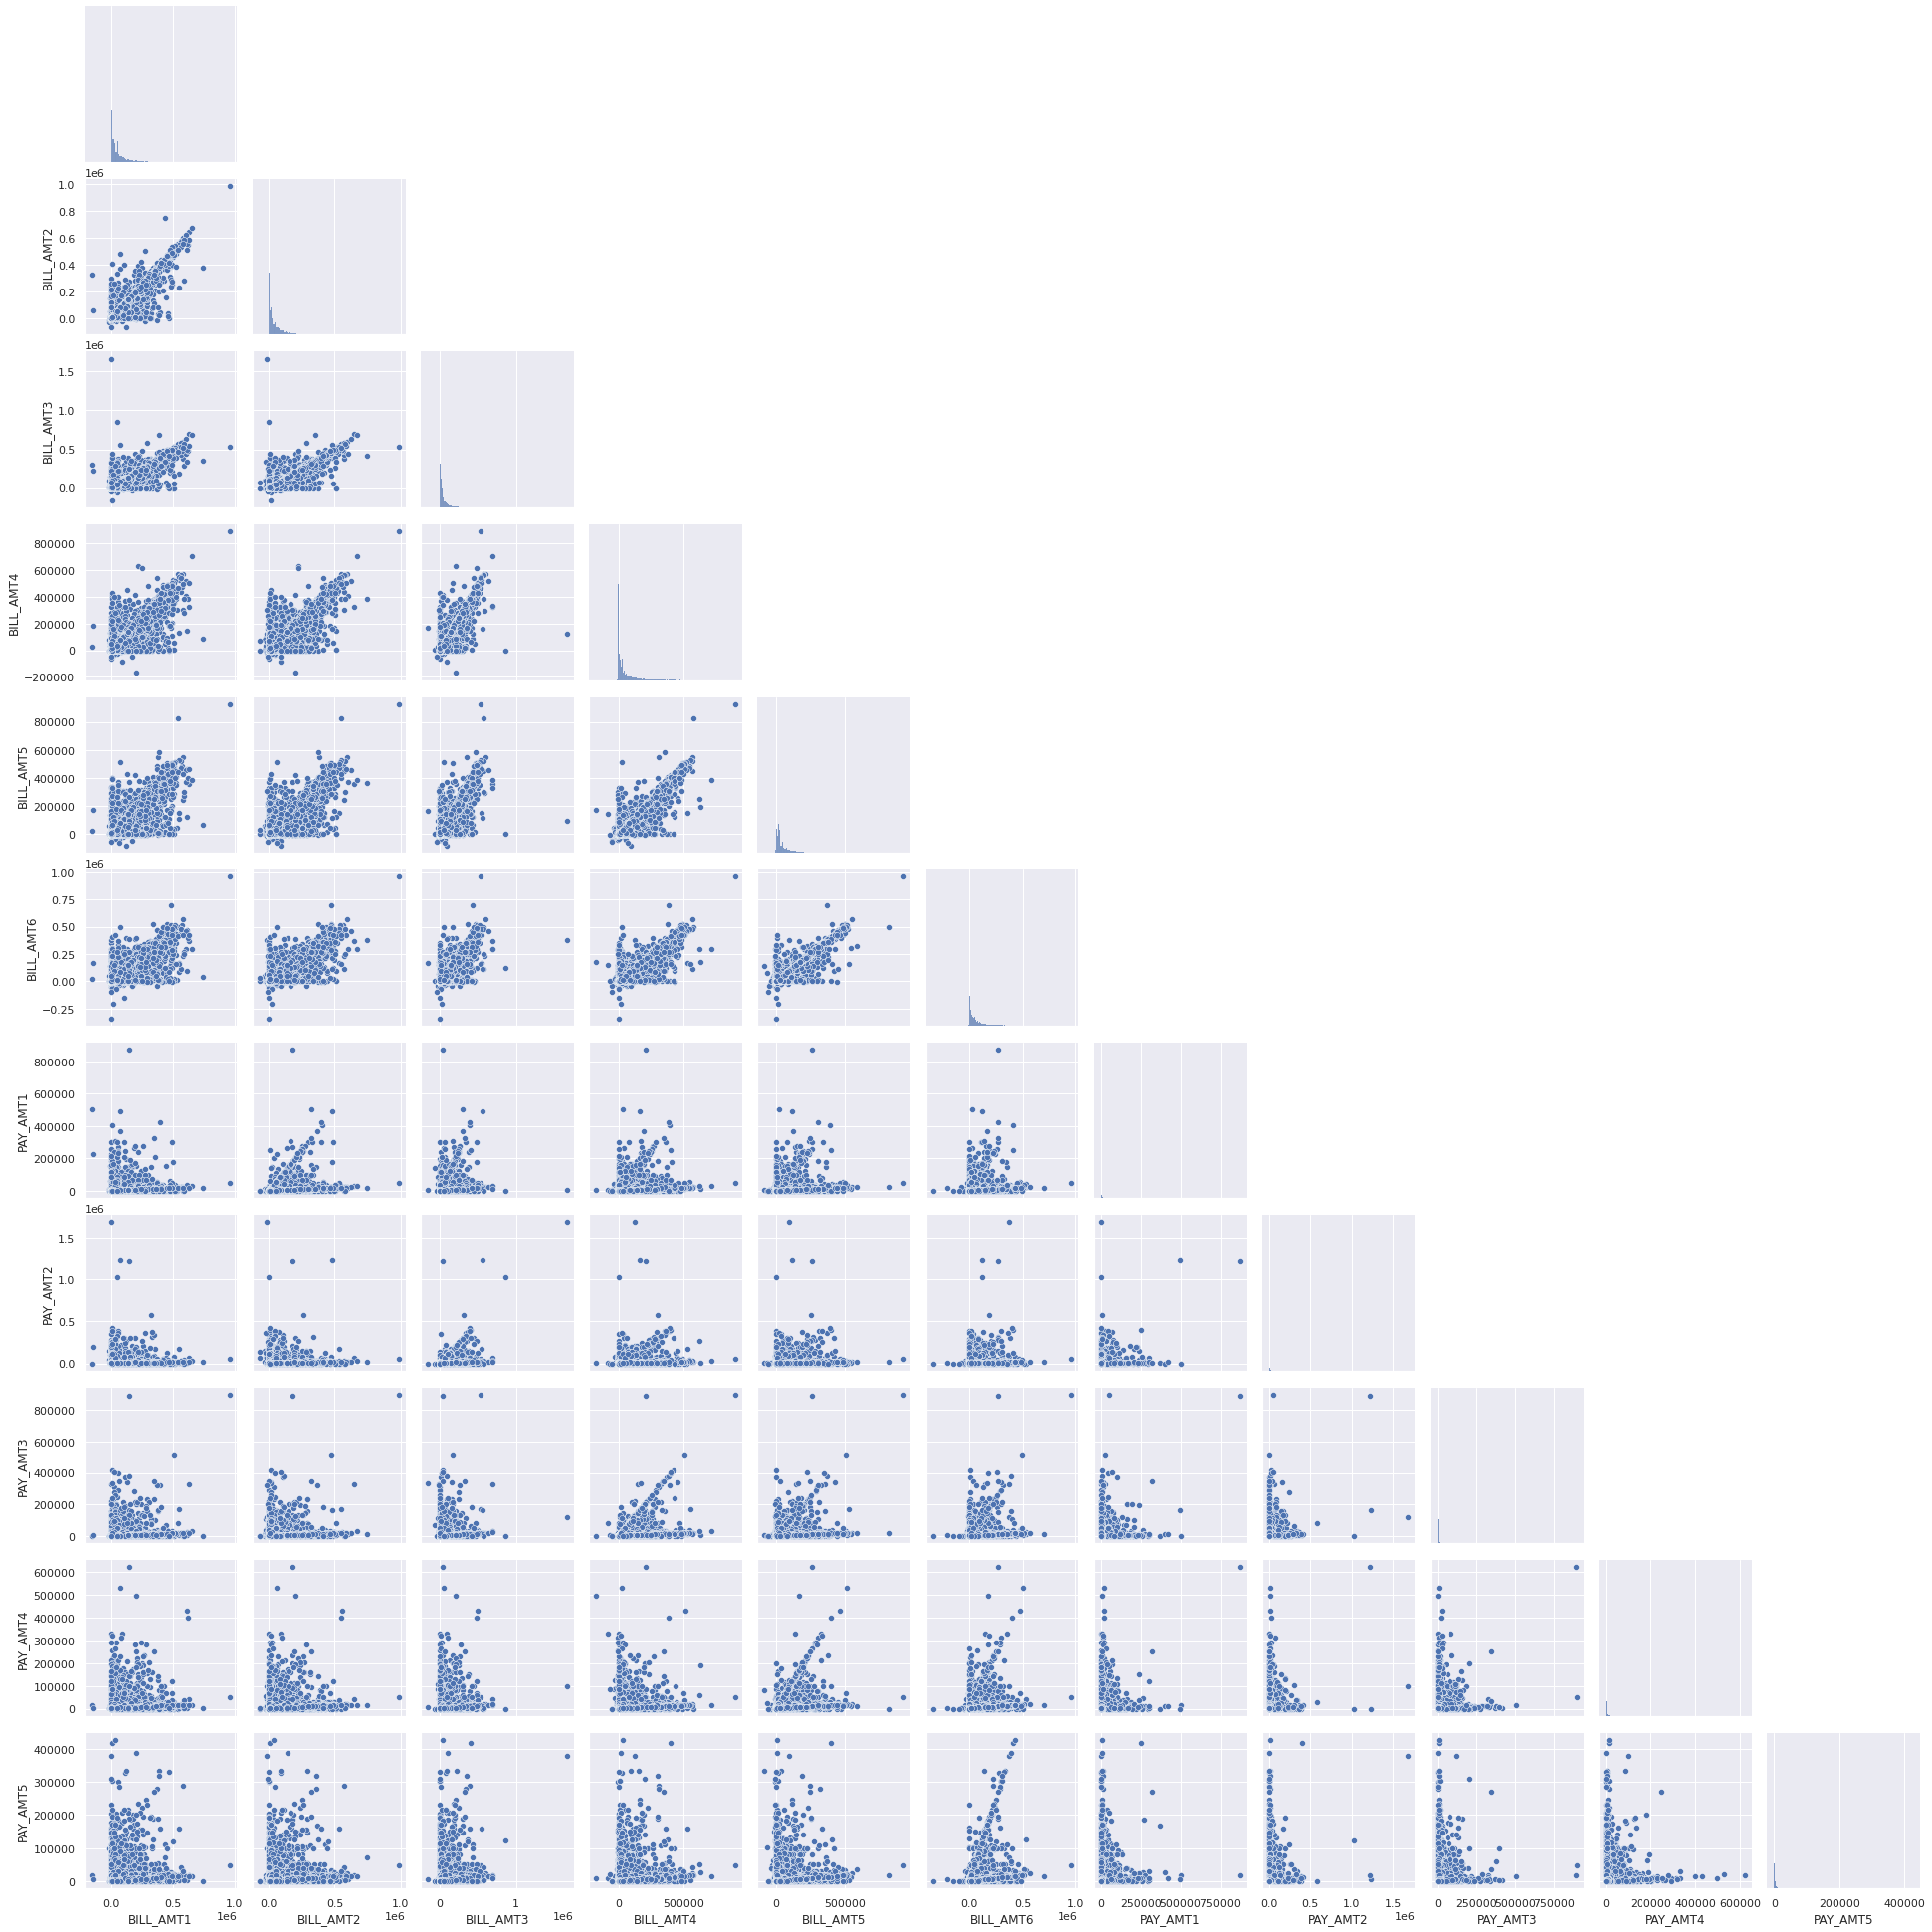

In [ ]:
sns.pairplot(df1.iloc[:, 11:22], diag_kind = "hist", corner = True)

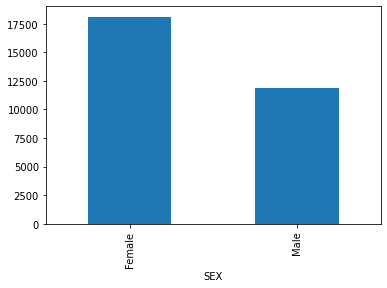

In [ ]:
df1.groupby(["SEX"])["SEX"].count().plot.bar()

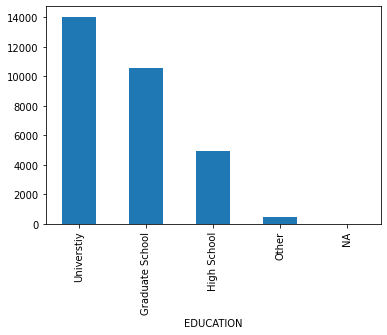

In [ ]:
df1.groupby(["EDUCATION"])["EDUCATION"].count().sort_values(ascending = False).plot.bar()

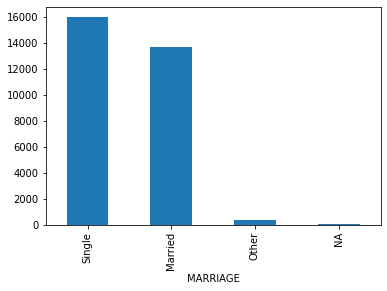

In [ ]:
df1.groupby(["MARRIAGE"])["MARRIAGE"].count().sort_values(ascending = False).plot.bar()

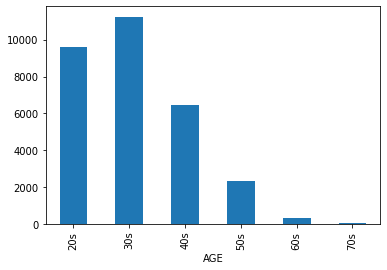

In [ ]:
df1.groupby(["AGE"])["AGE"].count().plot.bar()

<BarContainer object of 6 artists>

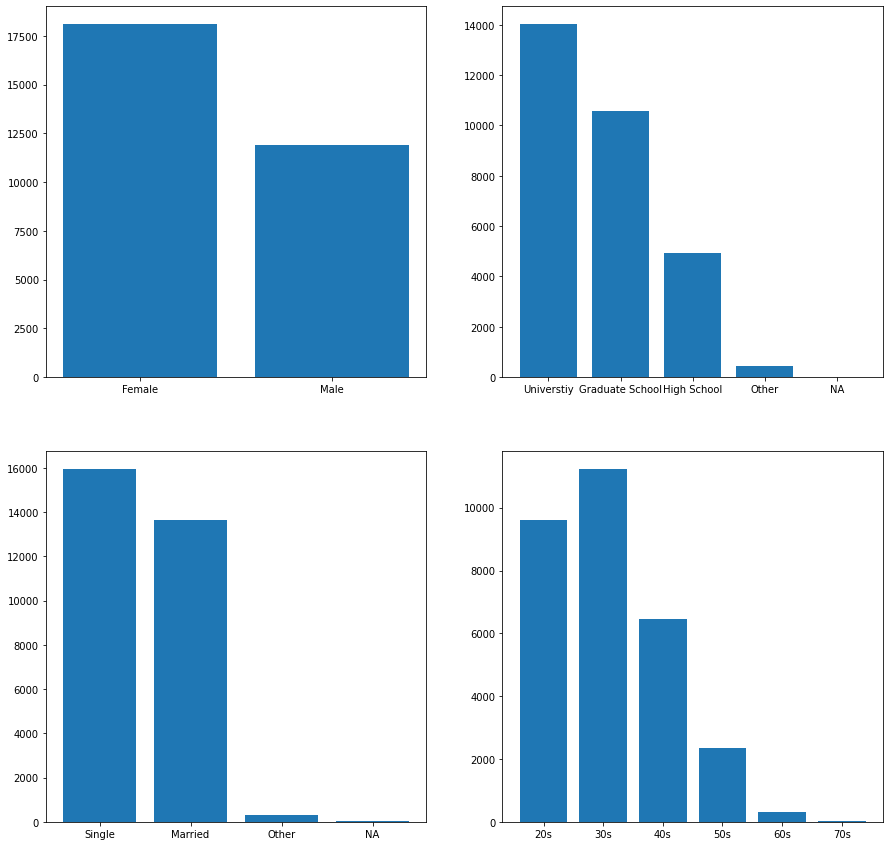

In [ ]:

fig, axs = plt.subplots(2,2, figsize = (15,15))
axs[0,0].bar(df1.groupby(["SEX"])["SEX"].count().index, df1.groupby(["SEX"])["SEX"].count())
axs[0,1].bar(df1.groupby(["EDUCATION"])["EDUCATION"].count().sort_values(ascending = False).index
             ,df1.groupby(["EDUCATION"])["EDUCATION"].count().sort_values(ascending = False))
axs[1,0].bar(df1.groupby(["MARRIAGE"])["MARRIAGE"].count().sort_values(ascending = False).index,
             df1.groupby(["MARRIAGE"])["MARRIAGE"].count().sort_values(ascending = False))
axs[1,1].bar(df1.groupby(["AGE"])["AGE"].count().index,
             df1.groupby(["AGE"])["AGE"].count())

# Cleaning the Data

## Removing highly correlated columns

In [ ]:
df.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6'], axis = 1, inplace = True)

## Converting to dummy variables

In [ ]:
new_df = pd.get_dummies(df, prefix=["SEX", "EDUCATION", "MARRIAGE"], 
                        columns=["SEX", "EDUCATION", "MARRIAGE"], drop_first = True)
new_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,0,...,1,0,1,0,0,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,0,...,1,0,1,0,0,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,1518,...,1,0,1,0,0,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,2000,...,1,0,1,0,0,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,2000,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0,188948,8500,...,0,0,0,1,0,0,0,1,0,0
29997,150000,43,-1,-1,-1,-1,0,0,1683,1837,...,0,0,0,1,0,0,0,0,1,0
29998,30000,37,4,3,2,-1,0,0,3565,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
new_df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
kite = StandardScaler()
new_df1 = kite.fit_transform(new_df[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6']])

new_df1

array([[-1.13672015, -1.24601985,  1.79456386, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 , -1.02904717, -0.87499115, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239, -0.16115646,  0.01486052, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618,  0.16430256,  3.57426721, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636,  0.59824792,  0.90471219, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825,  1.14067961,  0.01486052, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [ ]:
new_df[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6']] = new_df1

new_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.341942,...,1,0,1,0,0,0,0,1,0,0
2,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.341942,...,1,0,1,0,0,0,0,0,1,0
3,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.250292,...,1,0,1,0,0,0,0,0,1,0
4,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.221191,...,1,0,1,0,0,0,0,1,0,0
5,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.221191,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,0.171250,...,0,0,0,1,0,0,0,1,0,0
29997,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.231032,...,0,0,0,1,0,0,0,0,1,0
29998,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.341942,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y = new_df["default payment next month"]
new_df = new_df.drop(["default payment next month"], axis = 1)
new_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.341942,...,1,0,1,0,0,0,0,1,0,0
2,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.341942,...,1,0,1,0,0,0,0,0,1,0
3,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.250292,...,1,0,1,0,0,0,0,0,1,0
4,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.221191,...,1,0,1,0,0,0,0,1,0,0
5,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.221191,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,0.171250,...,0,0,0,1,0,0,0,1,0,0
29997,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.231032,...,0,0,0,1,0,0,0,0,1,0
29998,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.341942,...,0,0,1,0,0,0,0,0,1,0


# Data Partitioning

In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(new_df, y, train_size = 0.75, random_state = 30)
print('Shape of dataset after partitioning:\n', train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

Shape of dataset after partitioning:
 (22500, 25) (22500,) (7500, 25) (7500,)


# KNN

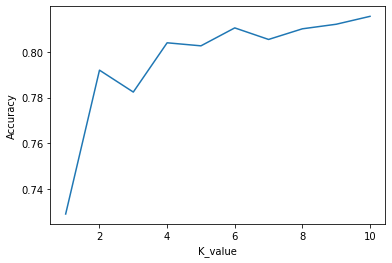

In [ ]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
acc_array=[]
data_frame = pd.DataFrame(columns = ['K_value', 'Accuracy'])
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X, train_y)
    predict_i = knn.predict(valid_X)
    ac = accuracy_score(valid_y, predict_i)
    acc_array.append(ac)
    data_frame.loc[len(data_frame.index)] = [i,ac] 

sns.lineplot(x=data_frame.K_value,y=data_frame.Accuracy)

In [ ]:
data_frame

,K_value,Accuracy
0,1.0,0.728933
1,2.0,0.792000
2,3.0,0.782400
3,4.0,0.804000
4,5.0,0.802667
5,6.0,0.810533
6,7.0,0.805467
7,8.0,0.810133
8,9.0,0.812133
9,10.0,0.815600


We get highest accuracy with 10 Nearest Neighbours 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X, train_y)
pred_train_y = knn.predict(train_X)
pred_valid_y = knn.predict(valid_X)
print("representing the accuracy of the model:", accuracy_score(valid_y, pred_valid_y))
print("representing the performance of model on training data:\n", classification_report(train_y, pred_train_y))
print("representing the performance of model on testing data:\n", classification_report(valid_y, pred_valid_y)) 

representing the accuracy of the model: 0.8156
representing the performance of model on training data:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     17469
           1       0.73      0.36      0.48      5031

    accuracy                           0.83     22500
   macro avg       0.78      0.66      0.69     22500
weighted avg       0.81      0.83      0.80     22500

representing the performance of model on testing data:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5895
           1       0.63      0.33      0.43      1605

    accuracy                           0.82      7500
   macro avg       0.74      0.64      0.66      7500
weighted avg       0.79      0.82      0.79      7500



In [ ]:
knn = KNeighborsClassifier(n_neighbors=22500)
knn.fit(train_X, train_y)
predict_i = knn.predict(valid_X)
ac = accuracy_score(valid_y, predict_i)
ac

0.786

Our model has higher accuray than taking all Neighbours 

# Decision Tree


In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

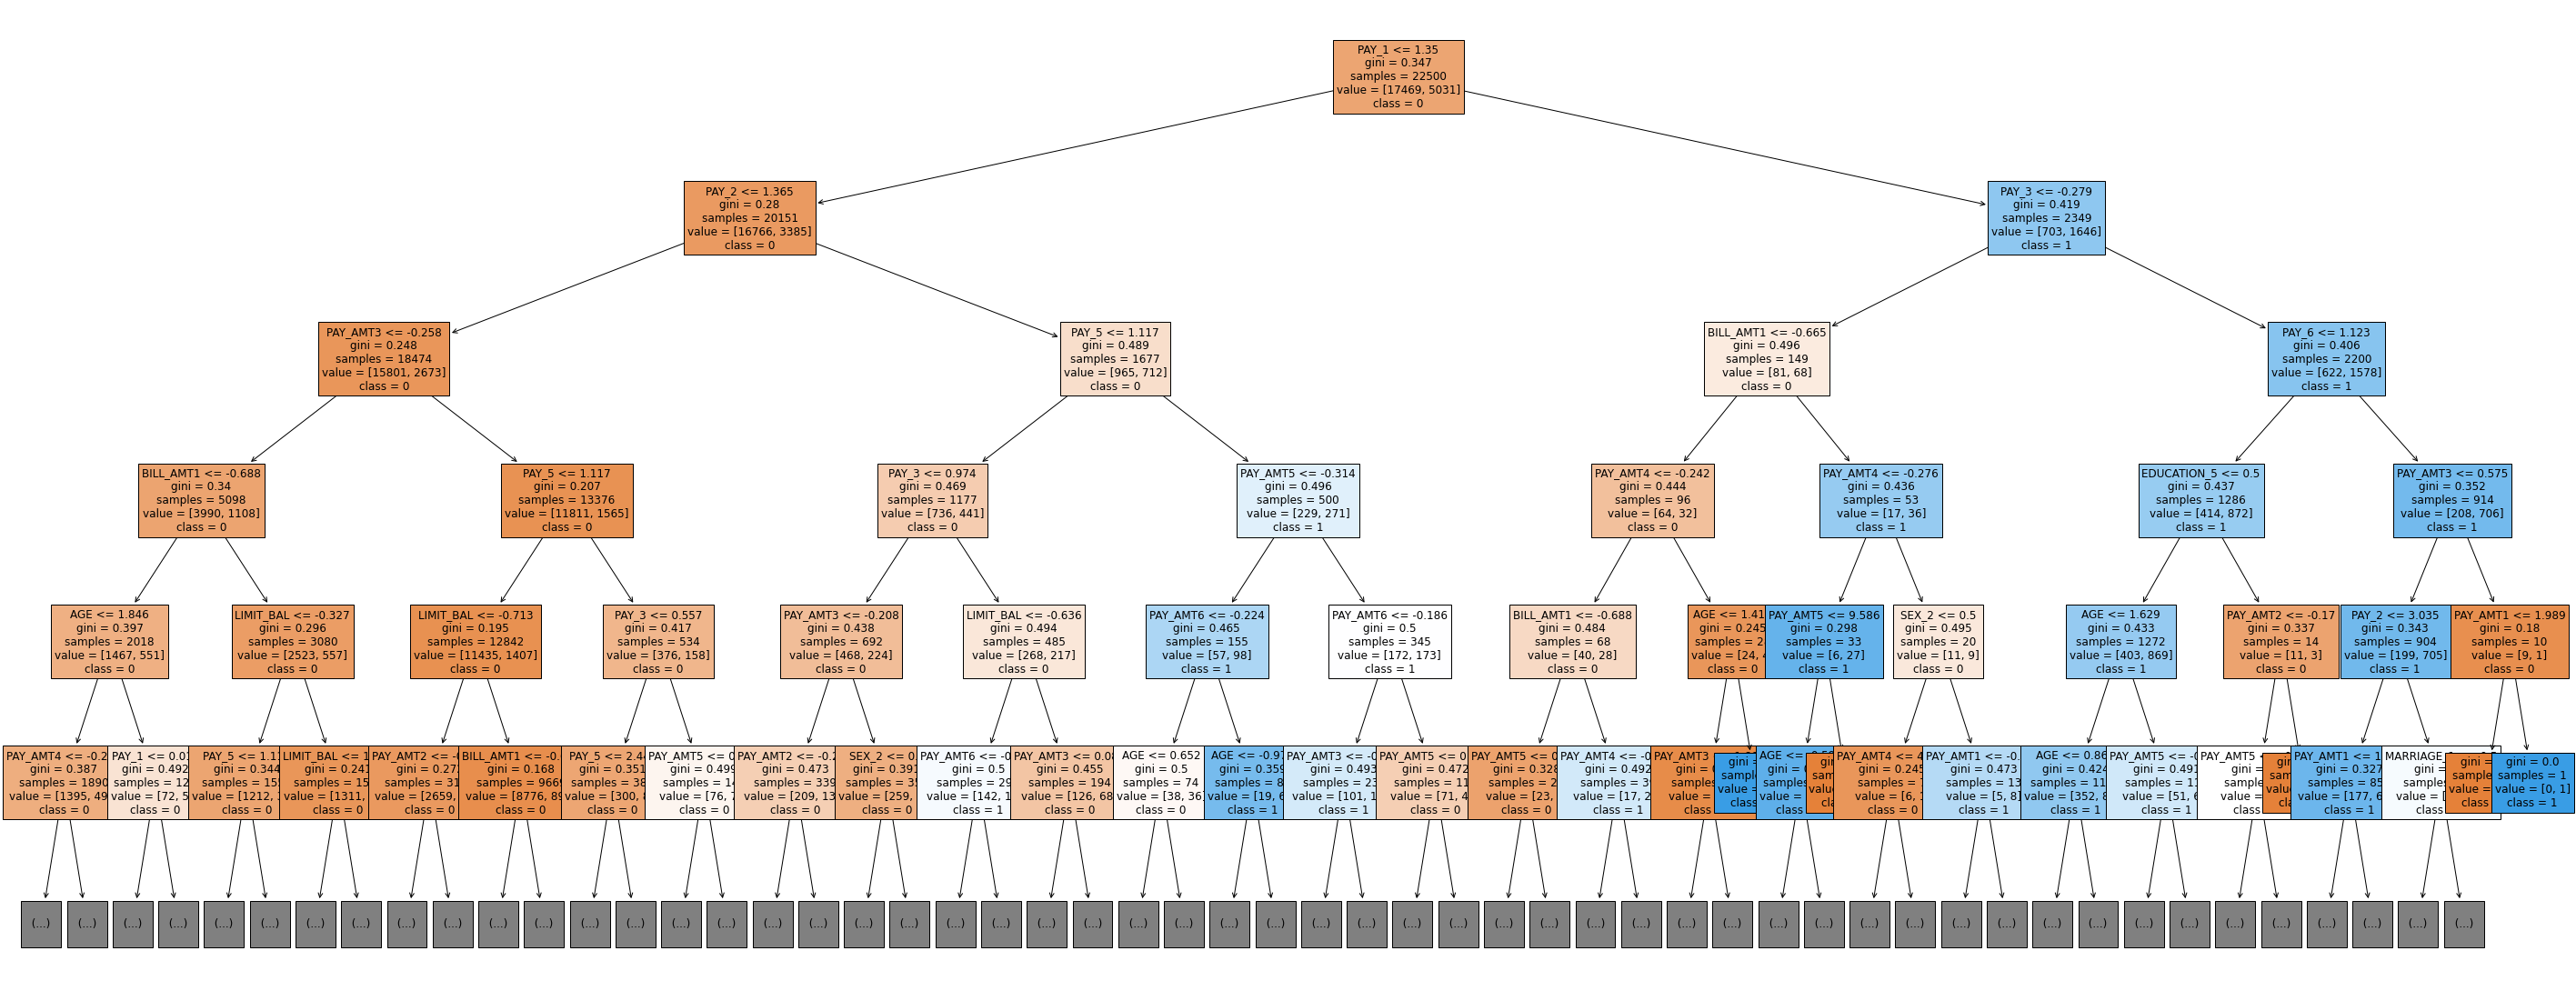

In [ ]:
plt.figure(figsize=(50,20))
a = plot_tree(model, max_depth = 5, feature_names=new_df.columns, fontsize = 12, class_names = ['0','1'], filled=True)

In [ ]:
path = model.cost_complexity_pruning_path(train_X, train_y)
Alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs Alpha Effective')

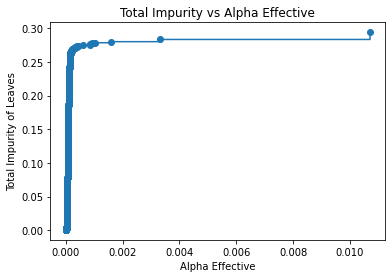

In [ ]:
fig, ax = plt.subplots()
ax.plot(Alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Alpha Effective")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Alpha Effective")

In [ ]:
Alp = path['ccp_alphas']
Alp

array([0.        , 0.00000909, 0.00001235, ..., 0.00330337, 0.01070488,
       0.05307358])

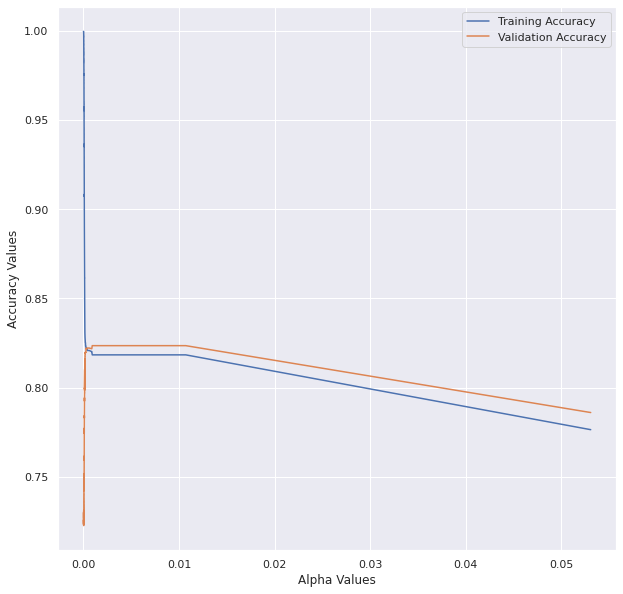

In [ ]:
Accuracy_train, Accuracy_test =[],[]
for j in Alp:
  tree= DecisionTreeClassifier(ccp_alpha=j)
  tree.fit(train_X,train_y)
  train_pred = tree.predict(train_X)
  valid_pred = tree.predict(valid_X)
  Accuracy_train.append(accuracy_score(train_y, train_pred))
  Accuracy_test.append(accuracy_score(valid_y, valid_pred))
sns.set()
plt.figure(figsize=(10,10))
sns.lineplot(y=Accuracy_train, x=Alphas, label='Training Accuracy')
sns.lineplot(y=Accuracy_test, x=Alphas, label='Validation Accuracy')
plt.xlabel("Alpha Values")
plt.ylabel("Accuracy Values")
plt.show()

In [ ]:
data_frame1 = pd.DataFrame(columns = ['CCP Alpha', 'Training Accuracy', 'Validation Accuracy'])
data_frame1['CCP Alpha'] = Alp
data_frame1['Training Accuracy'] = Accuracy_train
data_frame1['Validation Accuracy'] = Accuracy_test
data_frame1

,CCP Alpha,Training Accuracy,Validation Accuracy
0,0.000000,0.999511,0.725733
1,0.000009,0.999511,0.723333
2,0.000012,0.999511,0.726400
3,0.000015,0.999511,0.726267
4,0.000015,0.999511,0.730933
...,...,...,...
1477,0.001030,0.818311,0.823467
1478,0.001582,0.818311,0.823467
1479,0.003303,0.818311,0.823467
1480,0.010705,0.818311,0.823467


In [ ]:
data_frame1.max()

CCP Alpha              0.053074
Training Accuracy      0.999511
Validation Accuracy    0.823467
dtype: float64

In [ ]:
data_frame1[data_frame1['Validation Accuracy'] >= 0.823]

,CCP Alpha,Training Accuracy,Validation Accuracy
1476,0.000921,0.818311,0.823467
1477,0.001030,0.818311,0.823467
1478,0.001582,0.818311,0.823467
1479,0.003303,0.818311,0.823467
1480,0.010705,0.818311,0.823467


In [ ]:
tree = DecisionTreeClassifier(ccp_alpha=0.001,random_state=1)
tree.fit(train_X,train_y)
pred_train_y = tree.predict(train_X)
pred_valid_y = tree.predict(valid_X)

In [ ]:
print(accuracy_score(train_y,pred_train_y),accuracy_score(valid_y,pred_valid_y))

0.8183111111111111 0.8234666666666667


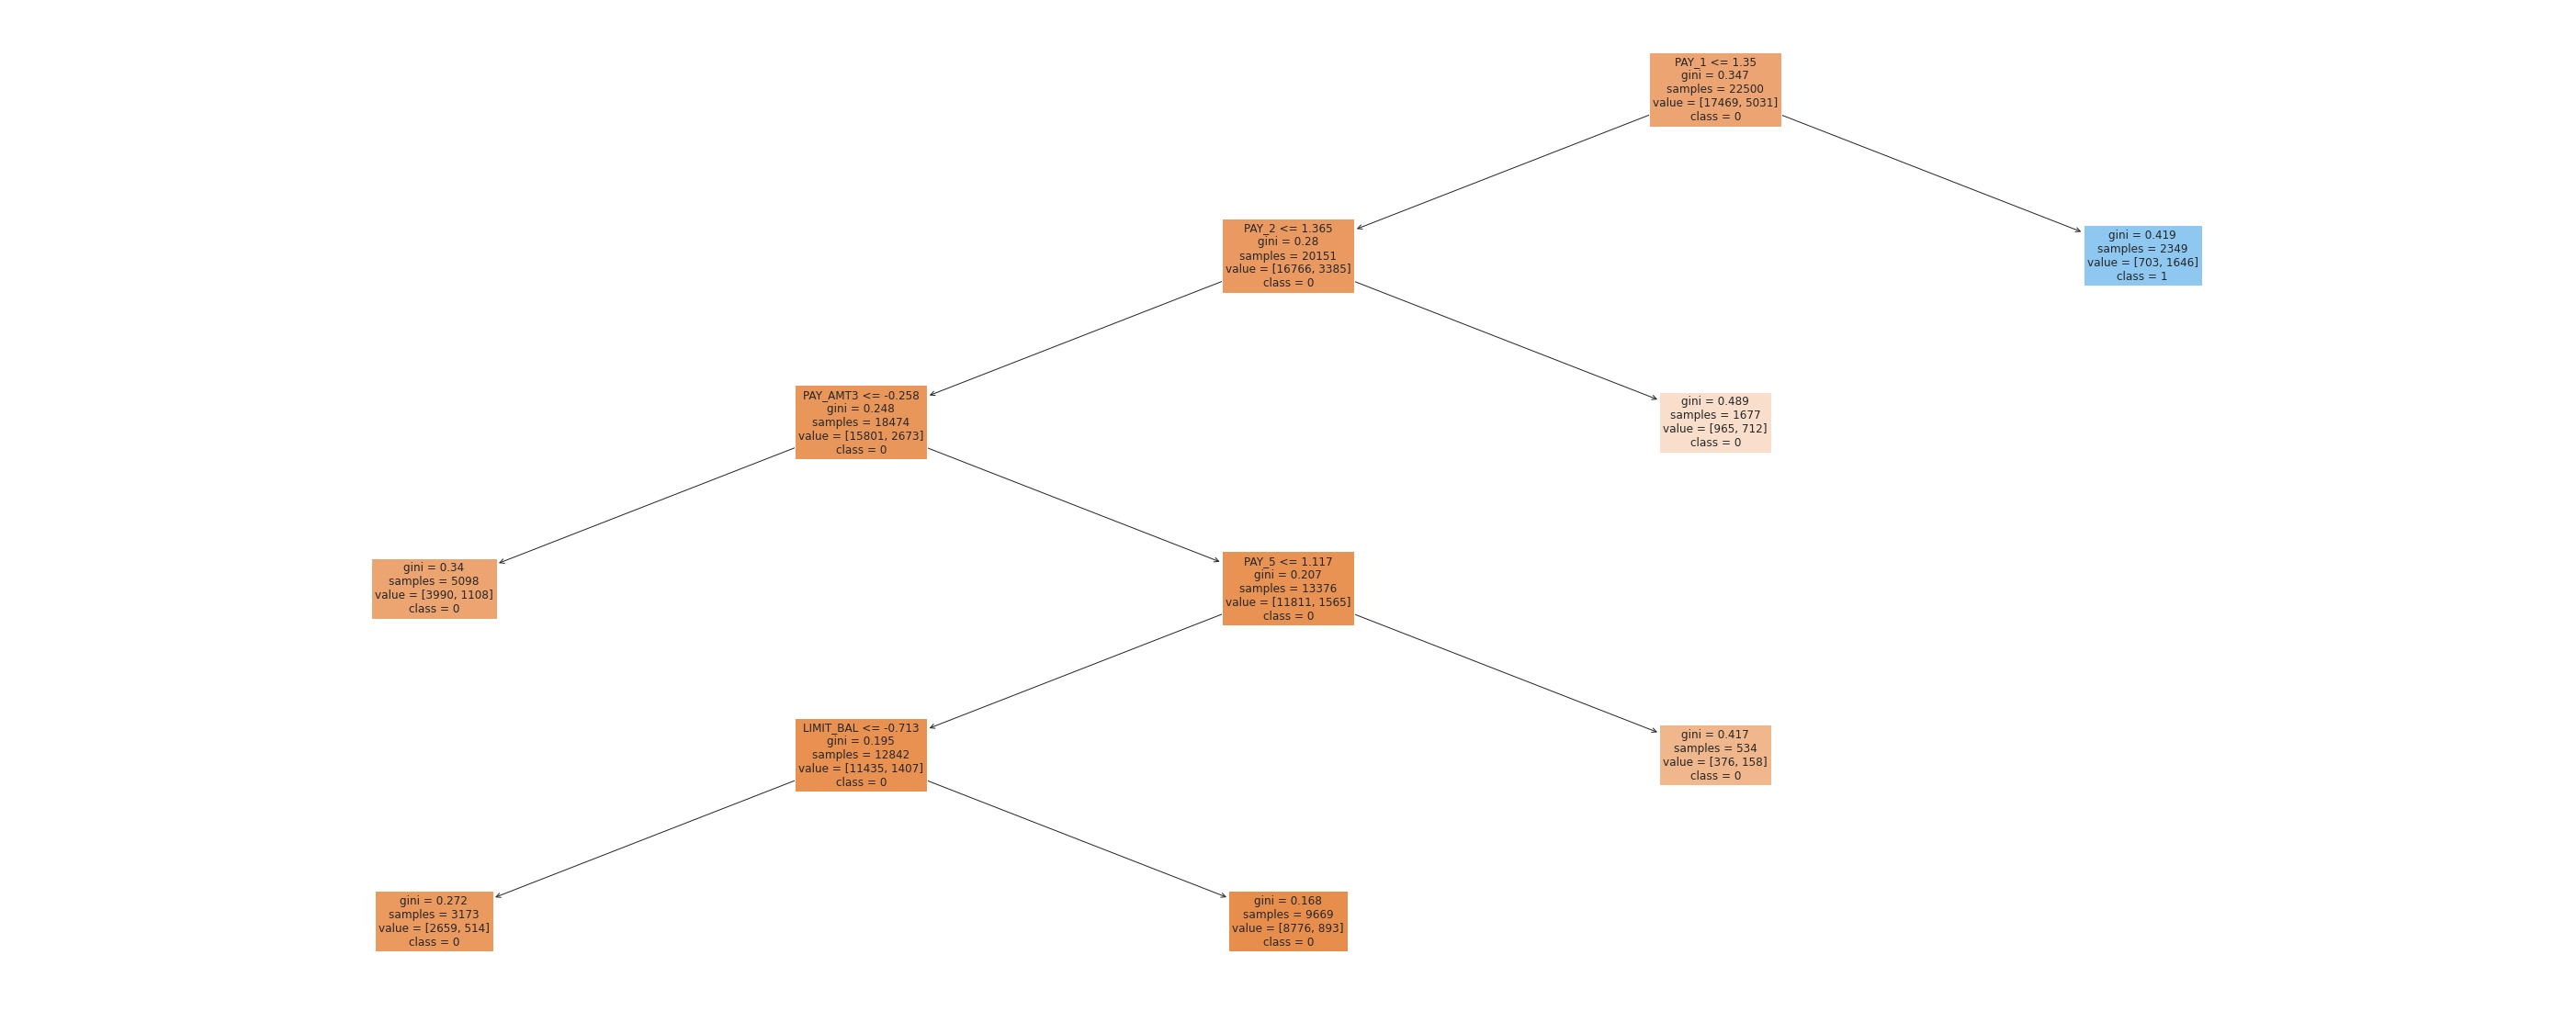

In [ ]:
plt.figure(figsize=(50,20))
a = plot_tree(tree, feature_names=new_df.columns, fontsize = 12, class_names = ['0','1'], filled=True)

In [ ]:
print("representing the accuracy of the model:", accuracy_score(valid_y, pred_valid_y))
print("representing the performance of model on training data:\n", classification_report(train_y, pred_train_y))
print("representing the performance of model on testing data:\n", classification_report(valid_y, pred_valid_y)) 

representing the accuracy of the model: 0.8234666666666667
representing the performance of model on training data:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     17469
           1       0.70      0.33      0.45      5031

    accuracy                           0.82     22500
   macro avg       0.77      0.64      0.67     22500
weighted avg       0.80      0.82      0.79     22500

representing the performance of model on testing data:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5895
           1       0.68      0.33      0.45      1605

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.67      7500
weighted avg       0.81      0.82      0.80      7500



# Naive Bayes


In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


In [ ]:
Model_NB = GaussianNB()
Model_NB.fit(train_X, train_y)
pred_train_y = Model_NB.predict(train_X)
pred_valid_y = Model_NB.predict(valid_X)
print("representing the accuracy of the model:", accuracy_score(valid_y, pred_valid_y))
print("representing the performance of model on training data:\n", classification_report(train_y, pred_train_y))
print("representing the performance of model on testing data:\n", classification_report(valid_y, pred_valid_y)) 

representing the accuracy of the model: 0.4124
representing the performance of model on training data:
               precision    recall  f1-score   support

           0       0.90      0.29      0.44     17469
           1       0.26      0.88      0.41      5031

    accuracy                           0.42     22500
   macro avg       0.58      0.59      0.42     22500
weighted avg       0.75      0.42      0.43     22500

representing the performance of model on testing data:
               precision    recall  f1-score   support

           0       0.89      0.29      0.44      5895
           1       0.25      0.87      0.39      1605

    accuracy                           0.41      7500
   macro avg       0.57      0.58      0.41      7500
weighted avg       0.75      0.41      0.43      7500

